29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1734368160.177515     120 service.cc:145] XLA service 0x799ba8006ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734368160.177563     120 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734368160.177568     120 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 68/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5336 - loss: 1.5030

I0000 00:00:1734368163.396506     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7438 - loss: 0.7341 - val_accuracy: 0.8569 - val_loss: 0.4050
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8730 - loss: 0.3545 - val_accuracy: 0.8825 - val_loss: 0.3279
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8909 - loss: 0.3050 - val_accuracy: 0.8902 - val_loss: 0.3094
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9017 - loss: 0.2667 - val_accuracy: 0.9013 - val_loss: 0.2752
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9133 - loss: 0.2386 - val_accuracy: 0.8993 - val_loss: 0.2724
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9214 - loss: 0.2135 - val_accuracy: 0.9049 - val_loss: 0.2634
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9300 - loss: 0.1929 - val_accuracy: 0.9081 - val_loss: 0.2587
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9358 - loss: 0.1762 - val_accuracy: 0.9146 - val_

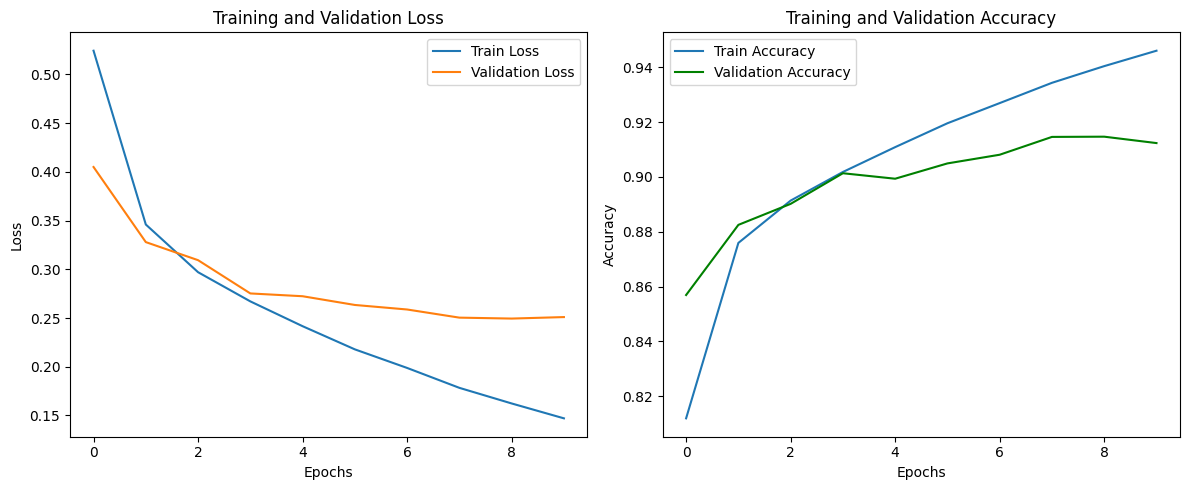

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split training data into training and validation sets
val_images = train_images[-12000:]
val_labels = train_labels[-12000:]
train_images = train_images[:-12000]
train_labels = train_labels[:-12000]

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7428 - loss: 0.7092 - val_accuracy: 0.8683 - val_loss: 0.3507
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8849 - loss: 0.3204 - val_accuracy: 0.9037 - val_loss: 0.2674
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9065 - loss: 0.2574 - val_accuracy: 0.9127 - val_loss: 0.2452
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9175 - loss: 0.2221 - val_accuracy: 0.9126 - val_loss: 0.2409
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9279 - loss: 0.2002 - val_accuracy: 0.9186 - val_loss: 0.2214
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9378 - loss: 0.1709 - val_accuracy: 0.9223 - val_loss: 0.2135
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9419 - loss: 0.1555 - val_accuracy: 0.9156 - val_loss: 0.2508
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9486 - loss: 0.1366 - val_accuracy: 0.

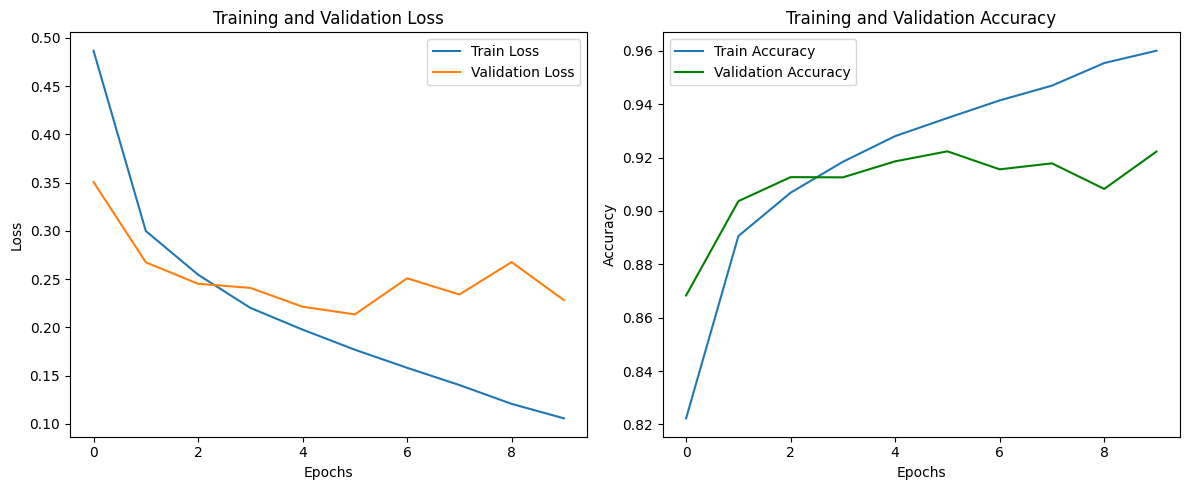

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split training data into training and validation sets
val_images = train_images[-12000:]
val_labels = train_labels[-12000:]
train_images = train_images[:-12000]
train_labels = train_labels[:-12000]

# AlexNet
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Training with SGD Optimizer
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5194 - loss: 1.4455 - val_accuracy: 0.7149 - val_loss: 0.7598
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7520 - loss: 0.6643 - val_accuracy: 0.7820 - val_loss: 0.5940
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7957 - loss: 0.5545 - val_accuracy: 0.7903 - val_loss: 0.5714
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8165 - loss: 0.5021 - val_accuracy: 0.8164 - val_loss: 0.5045
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8314 - loss: 0.4660 - val_accuracy: 0.8360 - val_loss: 0.4635
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8424 - loss: 0.4365 - val_accuracy: 0.8393 - val_loss: 0.4523
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8481 - loss: 0.4199 - val_accuracy: 0.8476 - val_loss: 0.4266
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8573 - los

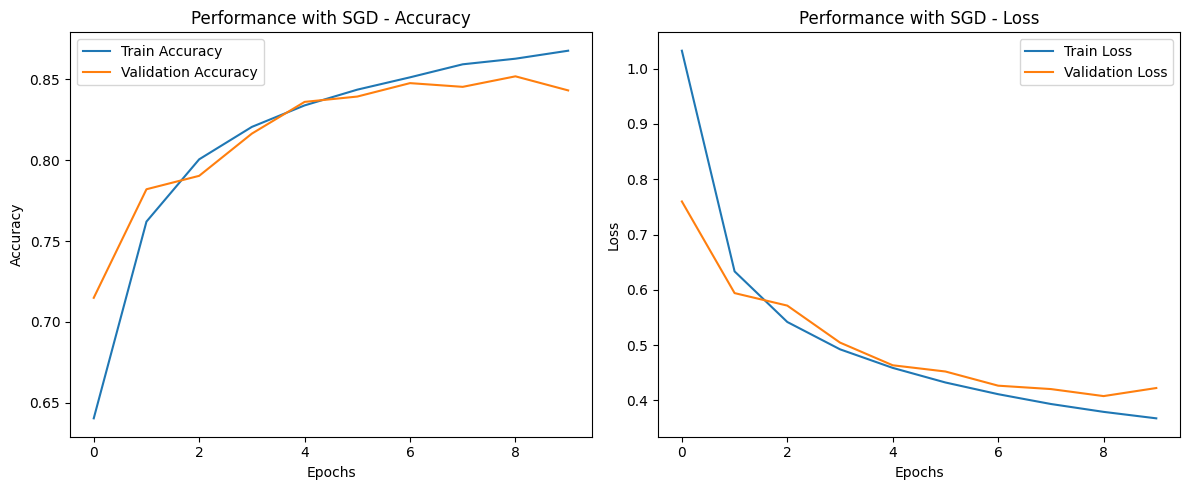


Training with Adam Optimizer
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8472 - loss: 0.4232 - val_accuracy: 0.8586 - val_loss: 0.3757
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8853 - loss: 0.3183 - val_accuracy: 0.8846 - val_loss: 0.3160
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8977 - loss: 0.2728 - val_accuracy: 0.8854 - val_loss: 0.3015
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9099 - loss: 0.2422 - val_accuracy: 0.8948 - val_loss: 0.2881
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9193 - loss: 0.2158 - val_accuracy: 0.8981 - val_loss: 0.2975
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9279 - loss: 0.1960 - val_accuracy: 0.9059 - val_loss: 0.2657
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9346 - loss: 0.1778 - val_accuracy: 0.9099 - val_loss: 0.2600
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9401 - l

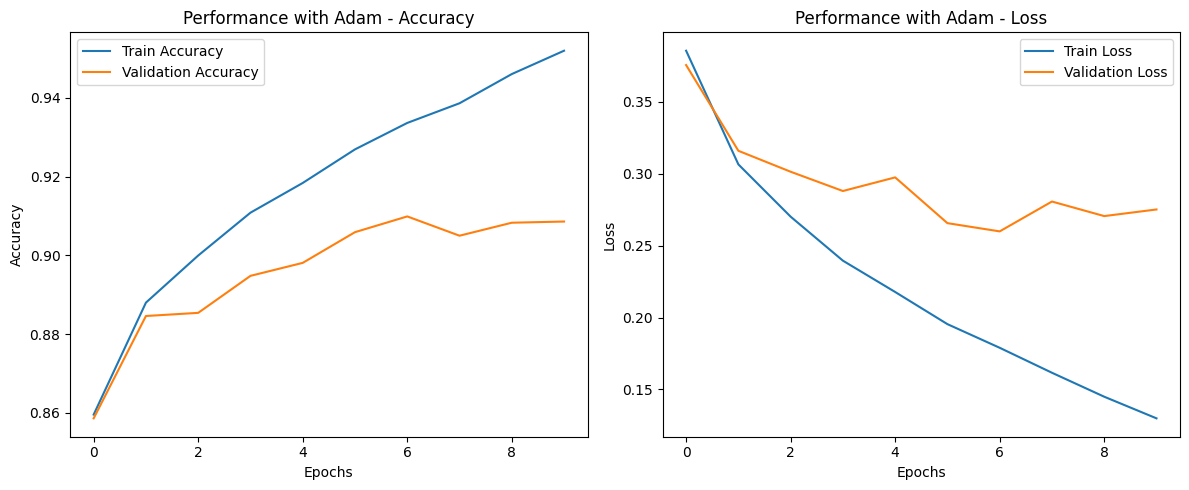

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the images (from 0-255 to 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Building the CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Function to train and evaluate the model with a given optimizer
def train_model(model, optimizer, epochs=10):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=epochs,
                        validation_data=(test_images[..., tf.newaxis], test_labels),
                        batch_size=64)
    
    return history

# Evaluate the model performance
def evaluate_model(history, optimizer_name):
    test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels, verbose=2)
    print(f"Test accuracy with {optimizer_name}: {test_acc}")

    plot_metrics(history, f"Performance with {optimizer_name}")

# Function to plot metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))
    
    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Build model
model = build_model()

# Train with SGD optimizer
print("Training with SGD Optimizer")
history_sgd = train_model(model, optimizer='sgd', epochs=10)
evaluate_model(history_sgd, "SGD")

# Train with Adam optimizer
print("\nTraining with Adam Optimizer")
history_adam = train_model(model, optimizer='adam', epochs=10)
evaluate_model(history_adam, "Adam")


Evaluating with 1 Conv layers, [32] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7940 - loss: 0.5808 - val_accuracy: 0.8794 - val_loss: 0.3394
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8926 - loss: 0.2995 - val_accuracy: 0.8918 - val_loss: 0.3003
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9082 - loss: 0.2517 - val_accuracy: 0.9004 - val_loss: 0.2683
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9214 - loss: 0.2150 - val_accuracy: 0.9039 - val_loss: 0.2714
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9309 - loss: 0.1885 - val_accuracy: 0.9136 - val_loss: 0.2428
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9393 - loss: 0.1654 - val_accuracy: 0.9095 - val_loss: 0.2584
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9475 - loss: 0.1418 - val_accuracy: 0.9079 - val_loss: 0.2648
Epoch 8/10
938/938 ━━━━━━━━━━━━

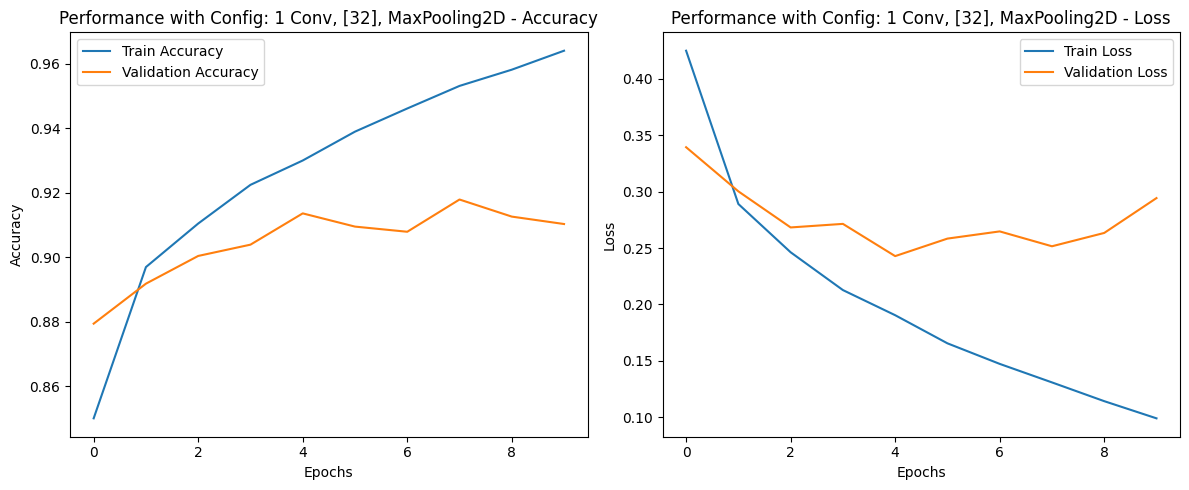

Evaluating with 1 Conv layers, [32] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7849 - loss: 0.6157 - val_accuracy: 0.8776 - val_loss: 0.3440
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8879 - loss: 0.3070 - val_accuracy: 0.8860 - val_loss: 0.3141
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9063 - loss: 0.2576 - val_accuracy: 0.8955 - val_loss: 0.2924
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9155 - loss: 0.2300 - val_accuracy: 0.8979 - val_loss: 0.2756
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9257 - loss: 0.1984 - val_accuracy: 0.9105 - val_loss: 0.2550
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9329 - loss: 0.1803 - val_accuracy: 0.9072 - val_loss: 0.2605
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9398 - loss: 0.1628 - val_accuracy: 0.9139 - val_loss: 0.2447
Epoch 8/10
938/938 ━━━━━━━━

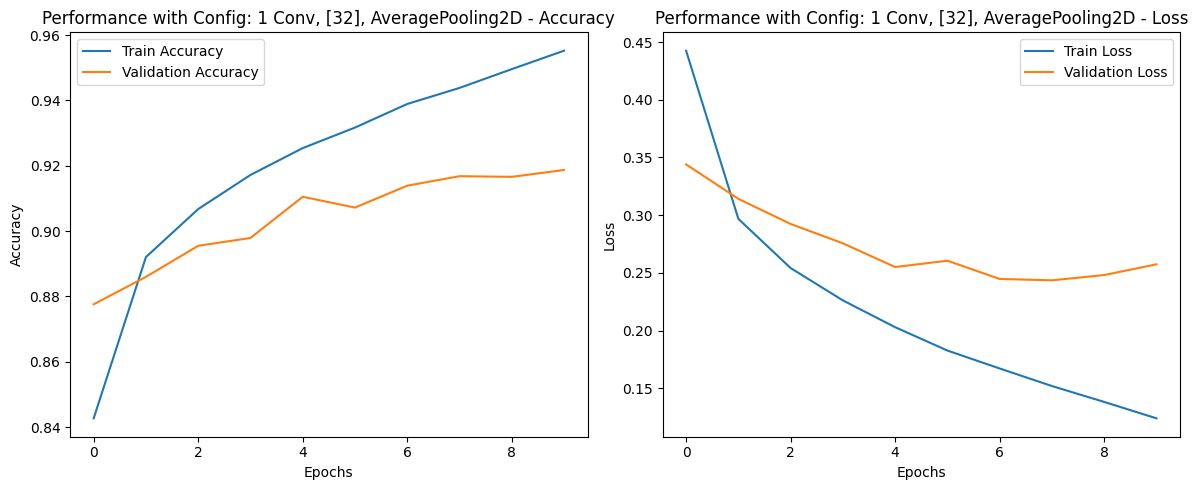

Evaluating with 1 Conv layers, [32, 64] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8002 - loss: 0.5741 - val_accuracy: 0.8790 - val_loss: 0.3414
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8948 - loss: 0.2933 - val_accuracy: 0.8941 - val_loss: 0.2833
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9137 - loss: 0.2398 - val_accuracy: 0.8999 - val_loss: 0.2755
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9253 - loss: 0.2027 - val_accuracy: 0.9079 - val_loss: 0.2578
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9325 - loss: 0.1822 - val_accuracy: 0.9138 - val_loss: 0.2501
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9441 - loss: 0.1560 - val_accuracy: 0.9128 - val_loss: 0.2465
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9504 - loss: 0.1372 - val_accuracy: 0.9192 - val_loss: 0.2500
Epoch 8/10
938/938 ━━━━━━━━

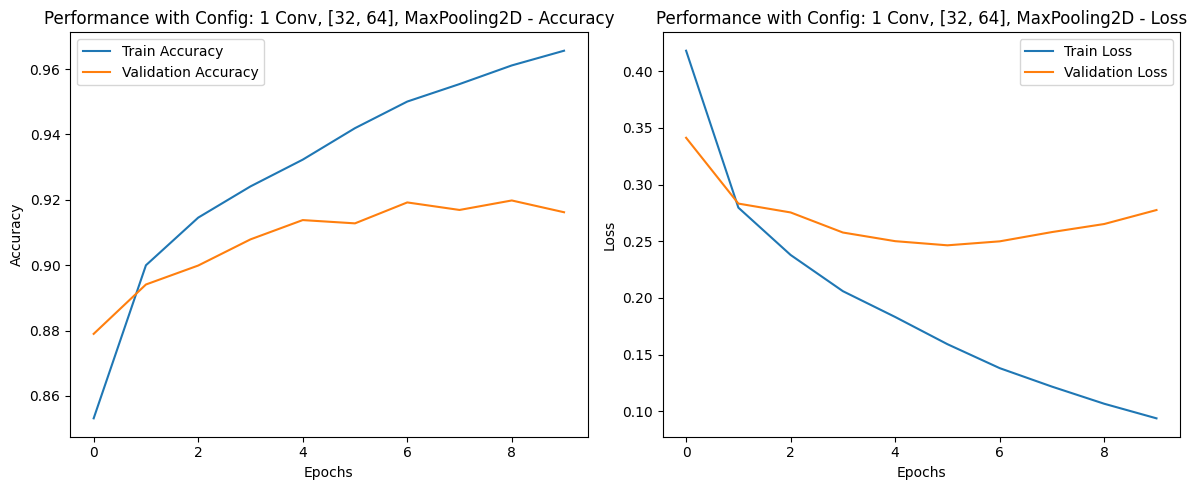

Evaluating with 1 Conv layers, [32, 64] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7839 - loss: 0.6151 - val_accuracy: 0.8755 - val_loss: 0.3486
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8852 - loss: 0.3177 - val_accuracy: 0.8847 - val_loss: 0.3215
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9039 - loss: 0.2701 - val_accuracy: 0.8896 - val_loss: 0.3031
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9143 - loss: 0.2357 - val_accuracy: 0.9025 - val_loss: 0.2678
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9242 - loss: 0.2076 - val_accuracy: 0.9058 - val_loss: 0.2585
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9300 - loss: 0.1898 - val_accuracy: 0.9111 - val_loss: 0.2518
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9350 - loss: 0.1783 - val_accuracy: 0.9102 - val_loss: 0.2490
Epoch 8/10
938/938 ━━━━

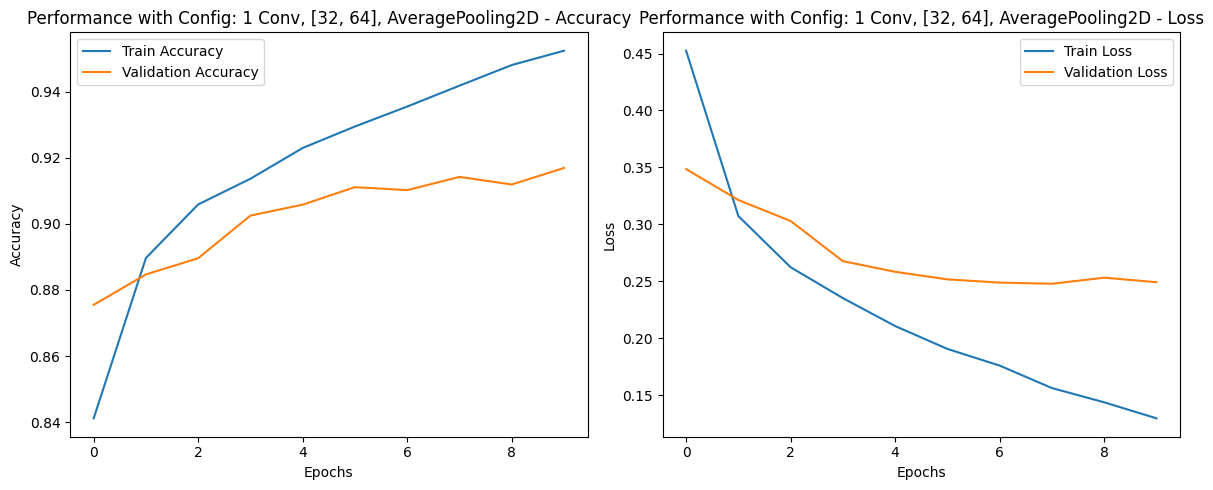

Evaluating with 1 Conv layers, [32, 64, 128] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8019 - loss: 0.5727 - val_accuracy: 0.8686 - val_loss: 0.3507
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8971 - loss: 0.2901 - val_accuracy: 0.8936 - val_loss: 0.2924
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9146 - loss: 0.2403 - val_accuracy: 0.9035 - val_loss: 0.2729
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9238 - loss: 0.2103 - val_accuracy: 0.9025 - val_loss: 0.2688
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9358 - loss: 0.1776 - val_accuracy: 0.9106 - val_loss: 0.2543
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9432 - loss: 0.1569 - val_accuracy: 0.9129 - val_loss: 0.2492
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9520 - loss: 0.1347 - val_accuracy: 0.9135 - val_loss: 0.2507
Epoch 8/10
938/938 ━━━

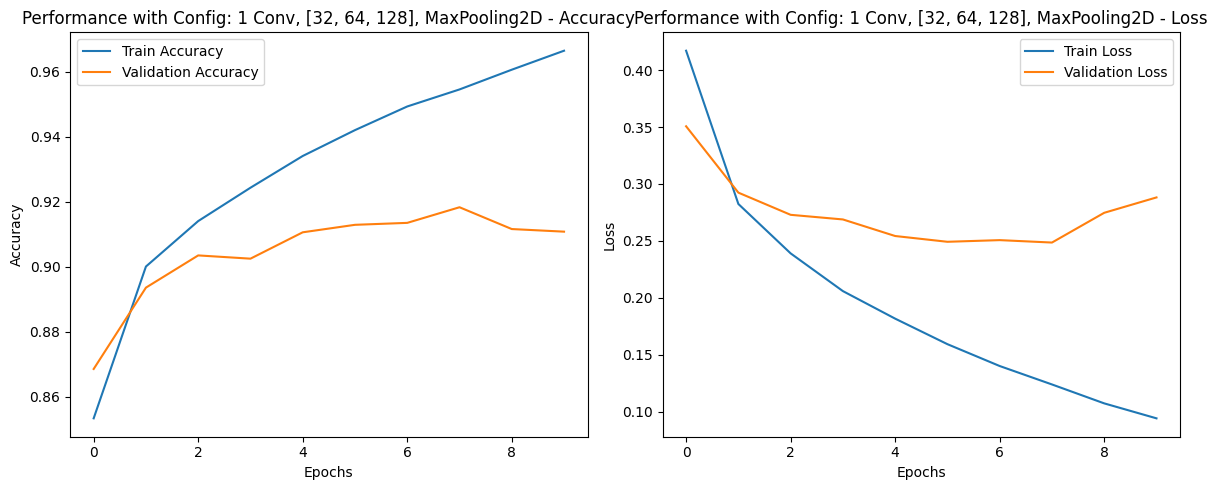

Evaluating with 1 Conv layers, [32, 64, 128] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7815 - loss: 0.6296 - val_accuracy: 0.8709 - val_loss: 0.3627
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.3210 - val_accuracy: 0.8859 - val_loss: 0.3112
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9002 - loss: 0.2763 - val_accuracy: 0.8914 - val_loss: 0.2998
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9144 - loss: 0.2381 - val_accuracy: 0.8991 - val_loss: 0.2738
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9218 - loss: 0.2159 - val_accuracy: 0.9075 - val_loss: 0.2581
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9297 - loss: 0.1905 - val_accuracy: 0.9038 - val_loss: 0.2626
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9368 - loss: 0.1742 - val_accuracy: 0.9100 - val_loss: 0.2548
Epoch 8/10
938/938

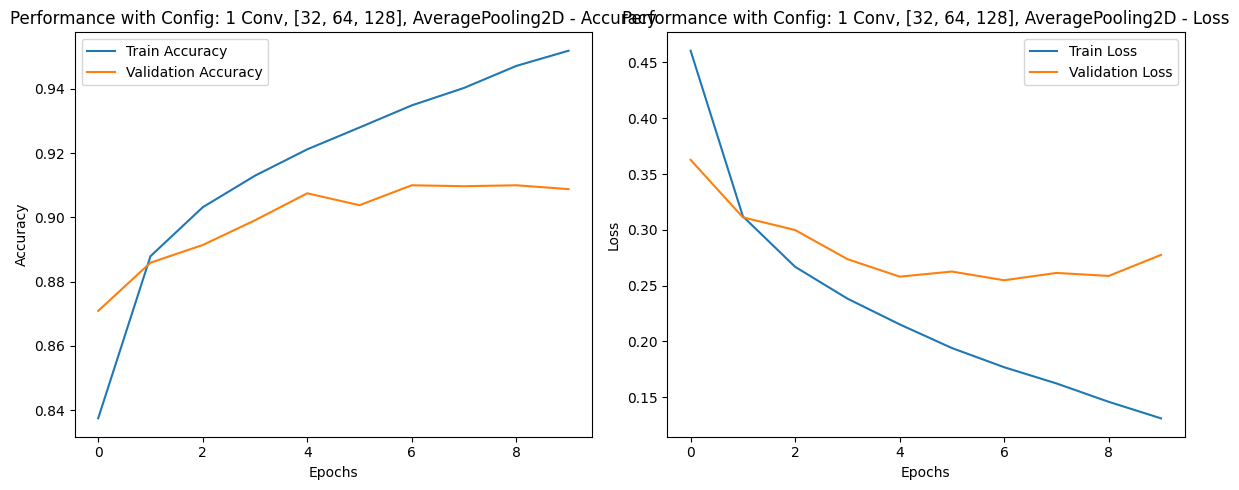

Evaluating with 2 Conv layers, [32] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7461 - loss: 0.7081 - val_accuracy: 0.8485 - val_loss: 0.4082
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8756 - loss: 0.3430 - val_accuracy: 0.8757 - val_loss: 0.3438
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8918 - loss: 0.2946 - val_accuracy: 0.8902 - val_loss: 0.3011
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9029 - loss: 0.2636 - val_accuracy: 0.8907 - val_loss: 0.2980
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9104 - loss: 0.2409 - val_accuracy: 0.8992 - val_loss: 0.2707
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9184 - loss: 0.2191 - val_accuracy: 0.9004 - val_loss: 0.2716
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2009 - val_accuracy: 0.9063 - val_loss: 0.2614
Epoch 8/10
938/938 ━━━━━━━━━━━━

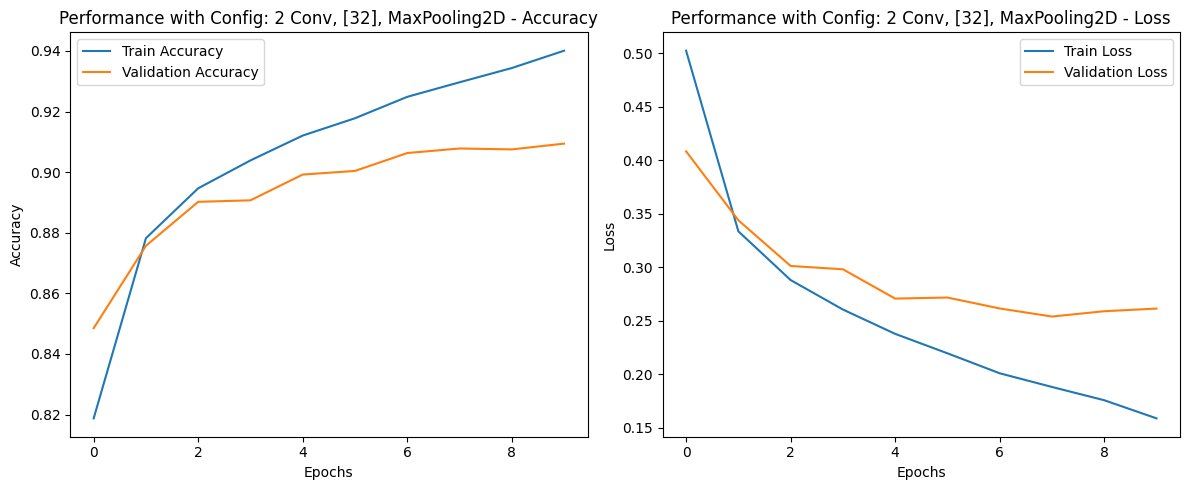

Evaluating with 2 Conv layers, [32] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7229 - loss: 0.7859 - val_accuracy: 0.8383 - val_loss: 0.4496
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8544 - loss: 0.4049 - val_accuracy: 0.8613 - val_loss: 0.3748
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8746 - loss: 0.3447 - val_accuracy: 0.8819 - val_loss: 0.3295
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8885 - loss: 0.3035 - val_accuracy: 0.8807 - val_loss: 0.3214
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9004 - loss: 0.2739 - val_accuracy: 0.8905 - val_loss: 0.2973
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9051 - loss: 0.2572 - val_accuracy: 0.8972 - val_loss: 0.2798
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9084 - loss: 0.2441 - val_accuracy: 0.8932 - val_loss: 0.2834
Epoch 8/10
938/938 ━━━━━━━━

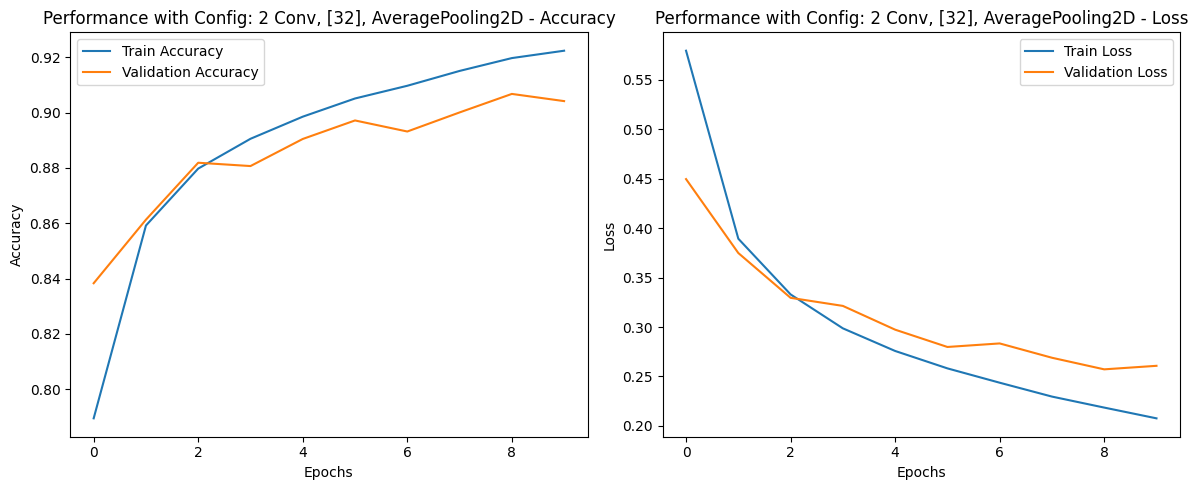

Evaluating with 2 Conv layers, [32, 64] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7610 - loss: 0.6816 - val_accuracy: 0.8713 - val_loss: 0.3642
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8801 - loss: 0.3302 - val_accuracy: 0.8877 - val_loss: 0.3139
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.2808 - val_accuracy: 0.8956 - val_loss: 0.2843
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9098 - loss: 0.2462 - val_accuracy: 0.8928 - val_loss: 0.2814
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9203 - loss: 0.2152 - val_accuracy: 0.9043 - val_loss: 0.2642
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9301 - loss: 0.1929 - val_accuracy: 0.9090 - val_loss: 0.2483
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9367 - loss: 0.1722 - val_accuracy: 0.9135 - val_loss: 0.2472
Epoch 8/10
938/938 ━━━━━━━━

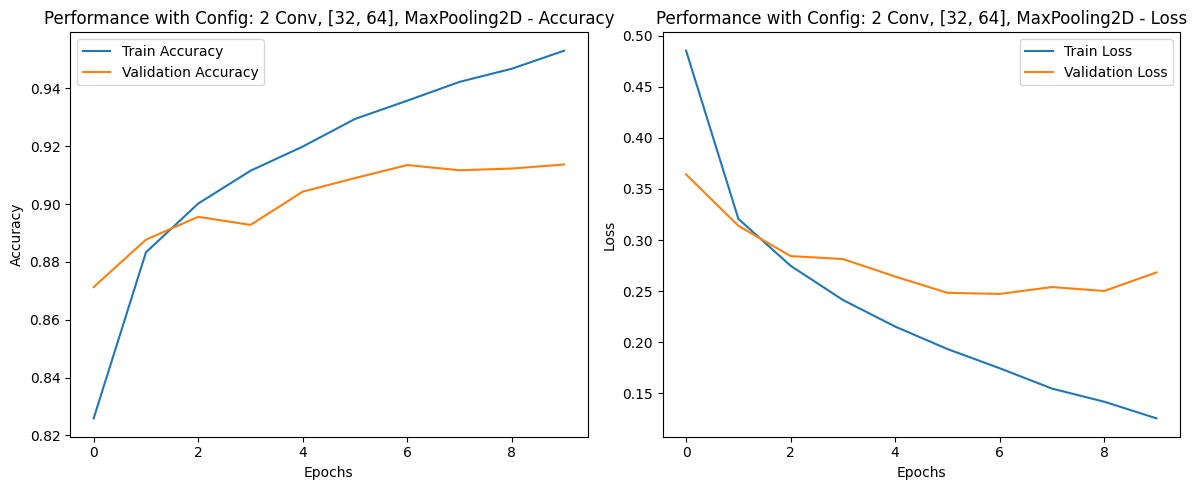

Evaluating with 2 Conv layers, [32, 64] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7305 - loss: 0.7521 - val_accuracy: 0.8418 - val_loss: 0.4365
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8641 - loss: 0.3783 - val_accuracy: 0.8766 - val_loss: 0.3466
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8848 - loss: 0.3181 - val_accuracy: 0.8830 - val_loss: 0.3276
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8922 - loss: 0.2865 - val_accuracy: 0.8913 - val_loss: 0.2959
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9050 - loss: 0.2595 - val_accuracy: 0.8984 - val_loss: 0.2846
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9103 - loss: 0.2413 - val_accuracy: 0.9023 - val_loss: 0.2741
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9179 - loss: 0.2237 - val_accuracy: 0.8992 - val_loss: 0.2790
Epoch 8/10
938/938 ━━━━

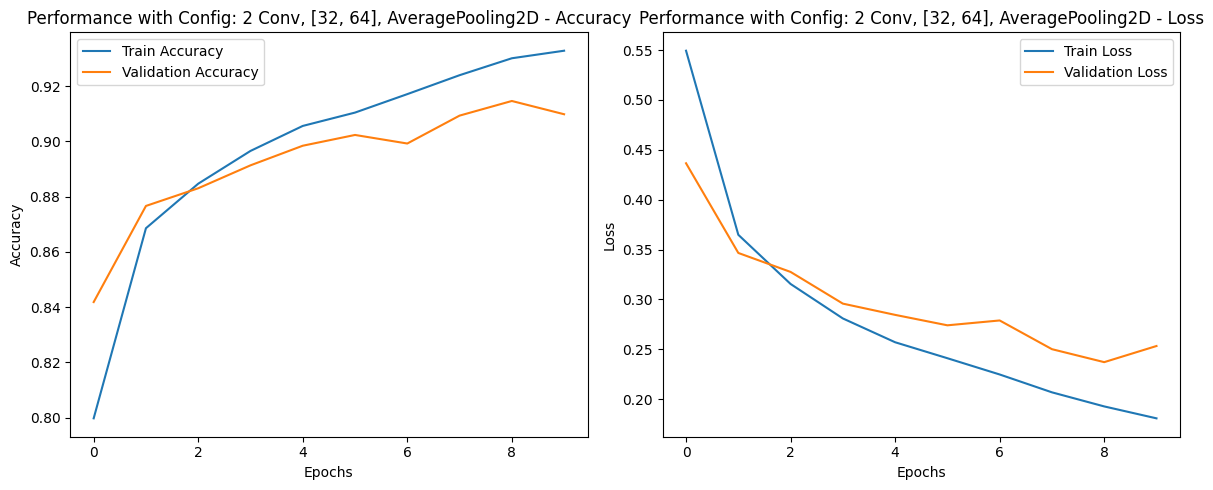

Evaluating with 2 Conv layers, [32, 64, 128] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7492 - loss: 0.6899 - val_accuracy: 0.8632 - val_loss: 0.3873
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8782 - loss: 0.3331 - val_accuracy: 0.8855 - val_loss: 0.3123
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8978 - loss: 0.2813 - val_accuracy: 0.8947 - val_loss: 0.2923
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 0.2562 - val_accuracy: 0.9015 - val_loss: 0.2649
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9169 - loss: 0.2227 - val_accuracy: 0.8990 - val_loss: 0.2776
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9253 - loss: 0.2002 - val_accuracy: 0.9005 - val_loss: 0.2667
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9341 - loss: 0.1805 - val_accuracy: 0.9109 - val_loss: 0.2497
Epoch 8/10
938/938 ━━━

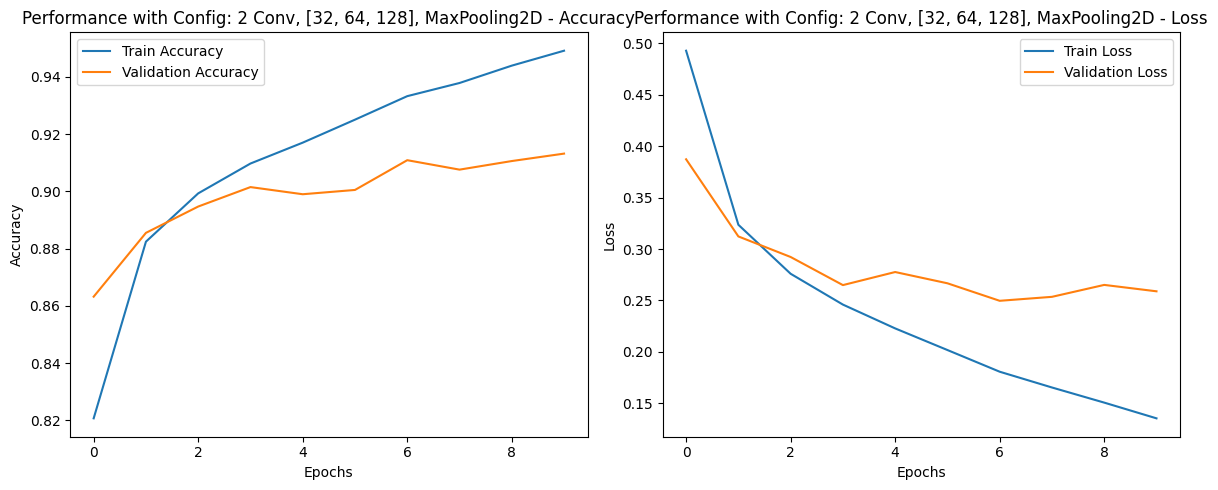

Evaluating with 2 Conv layers, [32, 64, 128] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7331 - loss: 0.7442 - val_accuracy: 0.8475 - val_loss: 0.4264
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8583 - loss: 0.3906 - val_accuracy: 0.8687 - val_loss: 0.3622
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8783 - loss: 0.3291 - val_accuracy: 0.8802 - val_loss: 0.3246
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8898 - loss: 0.2922 - val_accuracy: 0.8875 - val_loss: 0.3076
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9028 - loss: 0.2638 - val_accuracy: 0.8912 - val_loss: 0.2978
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9078 - loss: 0.2462 - val_accuracy: 0.9026 - val_loss: 0.2700
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9181 - loss: 0.2235 - val_accuracy: 0.8972 - val_loss: 0.2722
Epoch 8/10
938/938

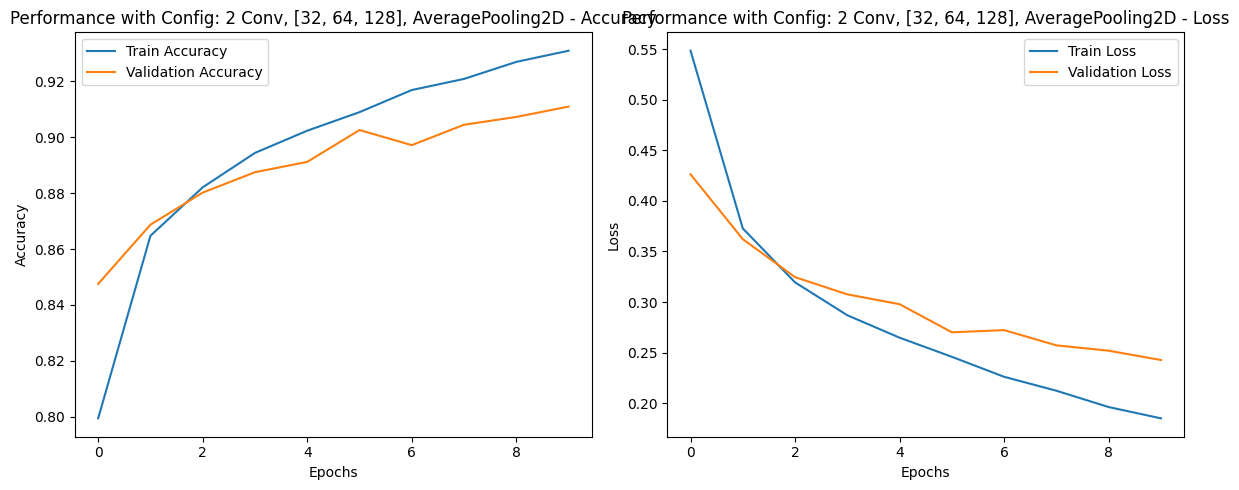

Evaluating with 3 Conv layers, [32] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6549 - loss: 0.9793 - val_accuracy: 0.8020 - val_loss: 0.5352
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8195 - loss: 0.4951 - val_accuracy: 0.8283 - val_loss: 0.4603
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8447 - loss: 0.4258 - val_accuracy: 0.8473 - val_loss: 0.4170
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8552 - loss: 0.3896 - val_accuracy: 0.8567 - val_loss: 0.3923
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8694 - loss: 0.3569 - val_accuracy: 0.8566 - val_loss: 0.3806
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.3389 - val_accuracy: 0.8615 - val_loss: 0.3843
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8815 - loss: 0.3190 - val_accuracy: 0.8703 - val_loss: 0.3573
Epoch 8/10
938/938 ━━━━━━━━━━━━

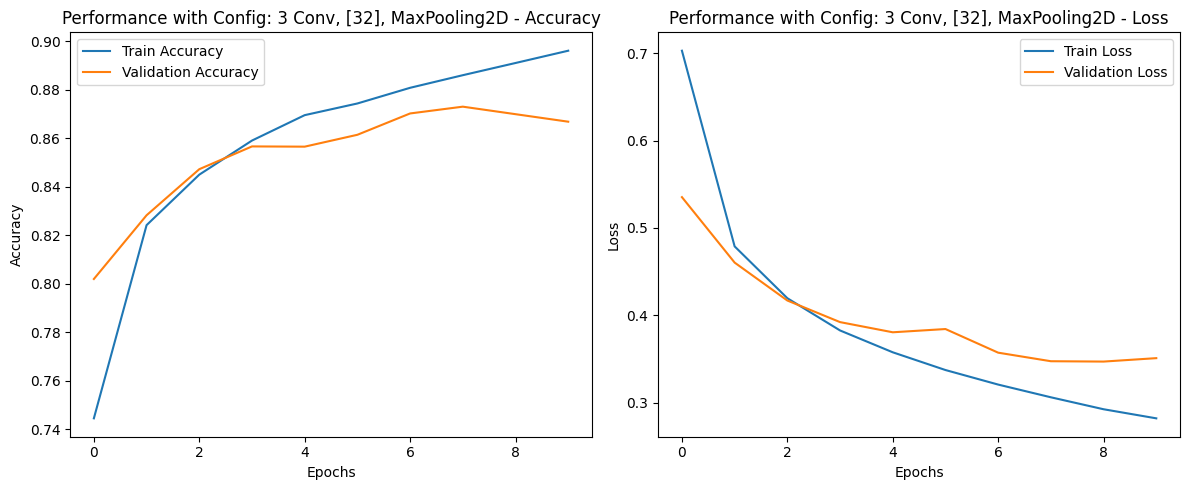

Evaluating with 3 Conv layers, [32] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5944 - loss: 1.0808 - val_accuracy: 0.7589 - val_loss: 0.6568
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7636 - loss: 0.6256 - val_accuracy: 0.7760 - val_loss: 0.5842
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7963 - loss: 0.5425 - val_accuracy: 0.7994 - val_loss: 0.5405
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8162 - loss: 0.4922 - val_accuracy: 0.8242 - val_loss: 0.4807
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8303 - loss: 0.4546 - val_accuracy: 0.8309 - val_loss: 0.4708
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8412 - loss: 0.4292 - val_accuracy: 0.8409 - val_loss: 0.4441
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8513 - loss: 0.3977 - val_accuracy: 0.8546 - val_loss: 0.4114
Epoch 8/10
938/938 ━━━━━━━━

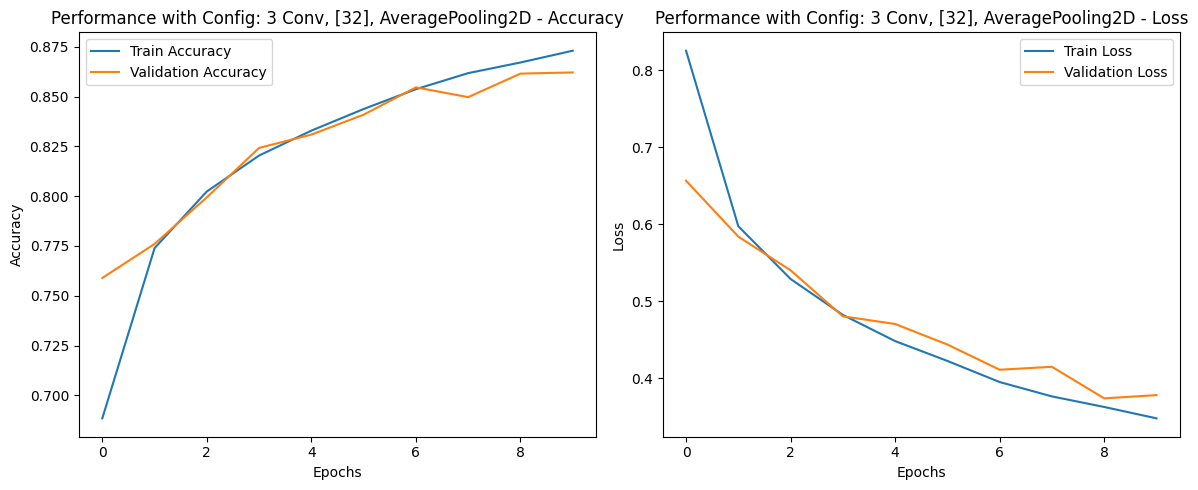

Evaluating with 3 Conv layers, [32, 64] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6726 - loss: 0.9238 - val_accuracy: 0.8231 - val_loss: 0.4982
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8335 - loss: 0.4578 - val_accuracy: 0.8434 - val_loss: 0.4373
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.3947 - val_accuracy: 0.8385 - val_loss: 0.4290
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8702 - loss: 0.3511 - val_accuracy: 0.8633 - val_loss: 0.3831
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8802 - loss: 0.3242 - val_accuracy: 0.8660 - val_loss: 0.3745
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8877 - loss: 0.2998 - val_accuracy: 0.8798 - val_loss: 0.3288
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8980 - loss: 0.2735 - val_accuracy: 0.8793 - val_loss: 0.3300
Epoch 8/10
938/938 ━━━━━━━━

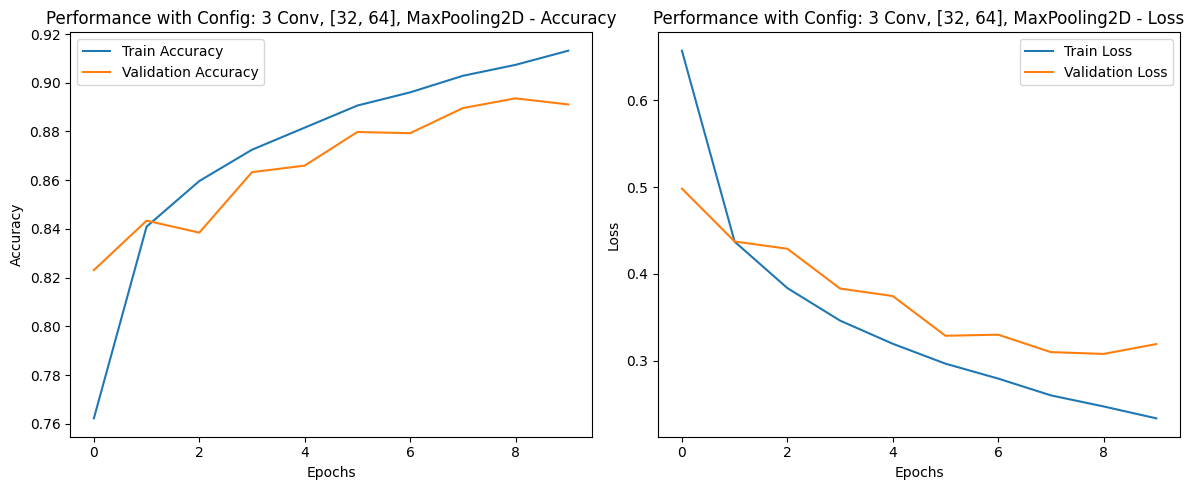

Evaluating with 3 Conv layers, [32, 64] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6139 - loss: 1.0467 - val_accuracy: 0.7597 - val_loss: 0.6471
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7805 - loss: 0.5879 - val_accuracy: 0.7831 - val_loss: 0.5712
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8082 - loss: 0.5184 - val_accuracy: 0.8198 - val_loss: 0.5014
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8280 - loss: 0.4660 - val_accuracy: 0.8170 - val_loss: 0.4989
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8408 - loss: 0.4326 - val_accuracy: 0.8373 - val_loss: 0.4401
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8509 - loss: 0.4038 - val_accuracy: 0.8411 - val_loss: 0.4224
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8630 - loss: 0.3725 - val_accuracy: 0.8547 - val_loss: 0.4019
Epoch 8/10
938/938 ━━━━

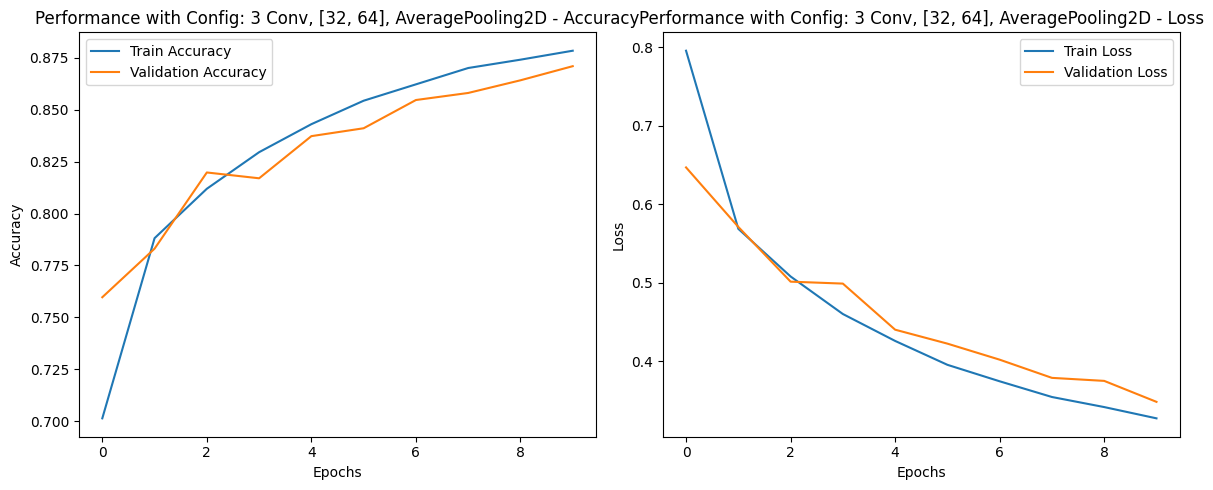

Evaluating with 3 Conv layers, [32, 64, 128] filters per layer, and MaxPooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6927 - loss: 0.8500 - val_accuracy: 0.8232 - val_loss: 0.4694
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8444 - loss: 0.4240 - val_accuracy: 0.8519 - val_loss: 0.4044
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8686 - loss: 0.3565 - val_accuracy: 0.8666 - val_loss: 0.3602
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8813 - loss: 0.3234 - val_accuracy: 0.8747 - val_loss: 0.3430
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8942 - loss: 0.2875 - val_accuracy: 0.8833 - val_loss: 0.3143
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9041 - loss: 0.2626 - val_accuracy: 0.8835 - val_loss: 0.3202
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9113 - loss: 0.2401 - val_accuracy: 0.8828 - val_loss: 0.3323
Epoch 8/10
938/938 ━━━

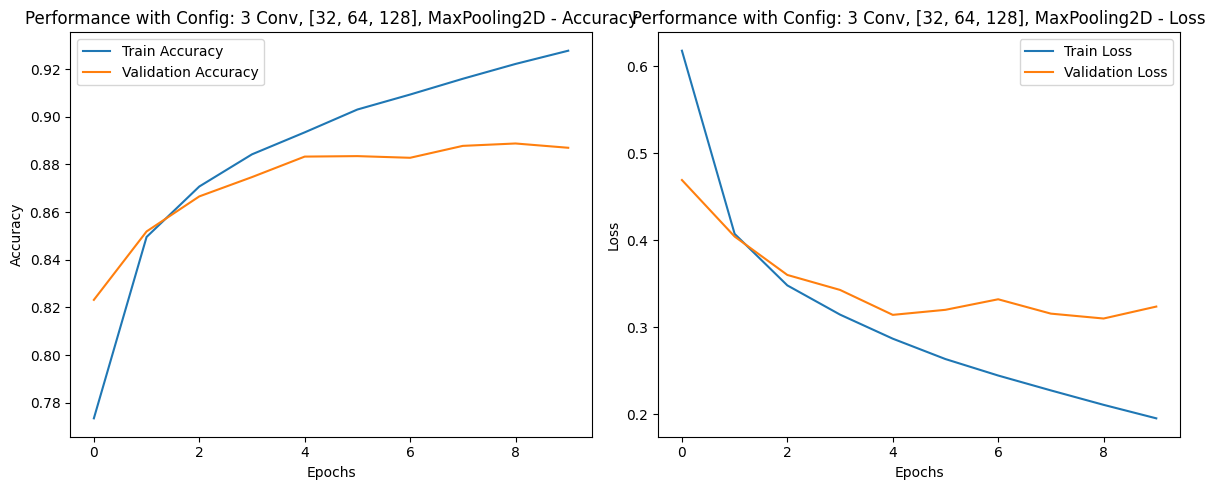

Evaluating with 3 Conv layers, [32, 64, 128] filters per layer, and AveragePooling2D.
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6458 - loss: 0.9558 - val_accuracy: 0.7665 - val_loss: 0.5977
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7995 - loss: 0.5371 - val_accuracy: 0.8237 - val_loss: 0.4889
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8276 - loss: 0.4621 - val_accuracy: 0.8406 - val_loss: 0.4417
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8459 - loss: 0.4127 - val_accuracy: 0.8565 - val_loss: 0.3954
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8630 - loss: 0.3714 - val_accuracy: 0.8579 - val_loss: 0.3859
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8779 - loss: 0.3376 - val_accuracy: 0.8601 - val_loss: 0.3801
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.3169 - val_accuracy: 0.8771 - val_loss: 0.3360
Epoch 8/10
938/938

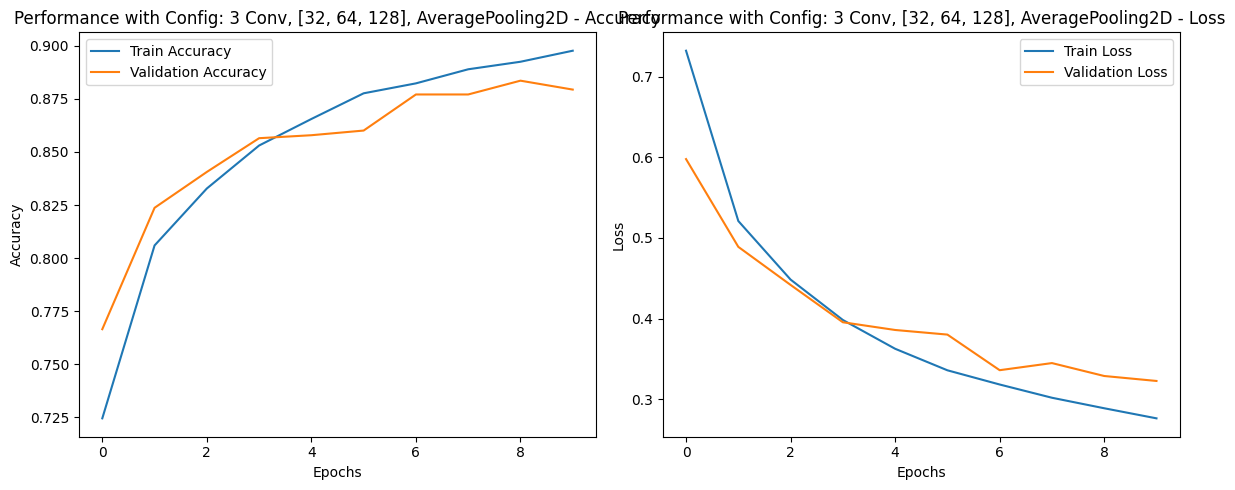

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Function to build model with varying architecture
def build_model(conv_layers, filters_per_layer, pooling_type):
    model = models.Sequential()
    
    # Check if filters_per_layer length matches conv_layers
    if len(filters_per_layer) < conv_layers:
        # Extend the list with default filter values (e.g., 32)
        filters_per_layer = filters_per_layer + [32] * (conv_layers - len(filters_per_layer))
    
    # Add convolutional layers
    for i in range(conv_layers):
        if i == 0:
            model.add(layers.Conv2D(filters_per_layer[i], (3, 3), activation='relu', input_shape=(28, 28, 1)))
        else:
            model.add(layers.Conv2D(filters_per_layer[i], (3, 3), activation='relu'))
        model.add(pooling_type(pool_size=(2, 2)))  # Adding pool_size parameter

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


# Function to train and evaluate the model with a given architecture
def train_evaluate_model(conv_layers, filters_per_layer, pooling_type, epochs=10):
    model = build_model(conv_layers, filters_per_layer, pooling_type)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=epochs,
                        validation_data=(test_images[..., tf.newaxis], test_labels),
                        batch_size=64)
    
    return history

# Analyze different configurations
def analyze_architectures():
    conv_layers_options = [1, 2, 3]  # 1, 2, 3 convolutional layers
    filters_per_layer_options = [[32], [32, 64], [32, 64, 128]]  # different number of filters
    pooling_types = [layers.MaxPooling2D, layers.AveragePooling2D]  # different pooling types

    for conv_layers in conv_layers_options:
        for filters_per_layer in filters_per_layer_options:
            for pooling_type in pooling_types:
                print(f"Evaluating with {conv_layers} Conv layers, {filters_per_layer} filters per layer, and {pooling_type.__name__}.")
                history = train_evaluate_model(conv_layers, filters_per_layer, pooling_type, epochs=10)
                evaluate_model(history, f"Config: {conv_layers} Conv, {filters_per_layer}, {pooling_type.__name__}")

# Evaluate the model performance
def evaluate_model(history, config_name):
    test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels, verbose=2)
    print(f"Test accuracy with {config_name}: {test_acc}")

    plot_metrics(history, f"Performance with {config_name}")

# Function to plot metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))
    
    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Analyze different model configurations
analyze_architectures()


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.6668 - loss: 0.9686 - val_accuracy: 0.9657 - val_loss: 0.1102
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9289 - loss: 0.2242 - val_accuracy: 0.9724 - val_loss: 0.0822
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9495 - loss: 0.1642 - val_accuracy: 0.9812 - val_loss: 0.0543
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9593 - loss: 0.1283 - val_accuracy: 0.9783 - val_loss: 0.0662
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9643 - loss: 0.1147 - val_accuracy: 0.9766 - val_loss: 0.0727
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9664 - loss: 0.1047 - val_accuracy: 0.9831 - val_loss: 0.0495
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9712 - loss: 0.0921 - val_accuracy: 0.9830 - val_loss: 0.0518
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9729 - loss: 0.0847 - 

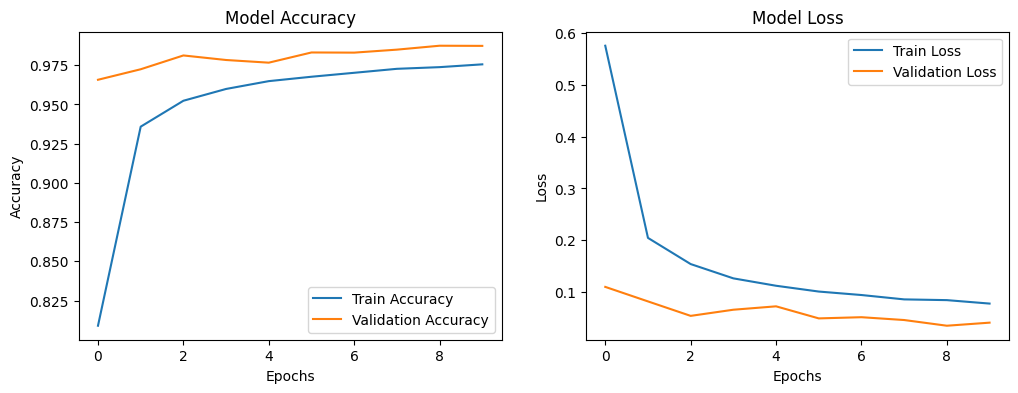

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Define the model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=10,
                    validation_data=(test_images, test_labels))

# Print accuracy
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7299 - loss: 1.9877 - val_accuracy: 0.8478 - val_loss: 0.4206
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8649 - loss: 0.3762 - val_accuracy: 0.8554 - val_loss: 0.4023
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.3207 - val_accuracy: 0.8775 - val_loss: 0.3449
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8944 - loss: 0.2863 - val_accuracy: 0.8737 - val_loss: 0.3527
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8988 - loss: 0.2698 - val_accuracy: 0.8878 - val_loss: 0.3324
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9090 - loss: 0.2444 - val_accuracy: 0.8795 - val_loss: 0.3487
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9154 - loss: 0.2262 - val_accuracy: 0.8867 - val_loss: 0.3230
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9189 - loss: 0.2162 - val_accuracy: 0.

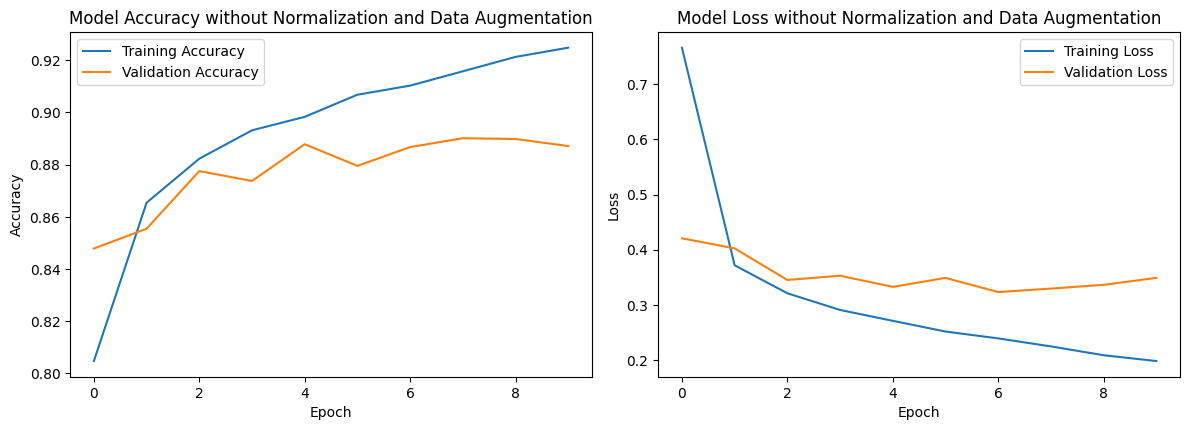

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)  # Adding channel dimension
test_images = np.expand_dims(test_images, axis=-1)  # Adding channel dimension

# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_no_norm_no_aug = model.fit(train_images, train_labels, epochs=10,
                                   validation_data=(test_images, test_labels),
                                   batch_size=64)

# Print accuracy
print("Training Accuracy:", history_no_norm_no_aug.history['accuracy'][-1])
print("Validation Accuracy:", history_no_norm_no_aug.history['val_accuracy'][-1])

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 8))

# Plot training and validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history_no_norm_no_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_norm_no_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy without Normalization and Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(2, 2, 2)
plt.plot(history_no_norm_no_aug.history['loss'], label='Training Loss')
plt.plot(history_no_norm_no_aug.history['val_loss'], label='Validation Loss')
plt.title('Model Loss without Normalization and Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.6341 - loss: 1.8345 - val_accuracy: 0.7959 - val_loss: 0.5843
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.7776 - loss: 0.5866 - val_accuracy: 0.8374 - val_loss: 0.4718
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8022 - loss: 0.5233 - val_accuracy: 0.8530 - val_loss: 0.4207
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8195 - loss: 0.4801 - val_accuracy: 0.8533 - val_loss: 0.4105
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8259 - loss: 0.4608 - val_accuracy: 0.8421 - val_loss: 0.4289
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8319 - loss: 0.4472 - val_accuracy: 0.8553 - val_loss: 0.4146
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8385 - loss: 0.4323 - val_accuracy: 0.8604 - val_loss: 0.3860
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8445 - loss: 0.4146 - 

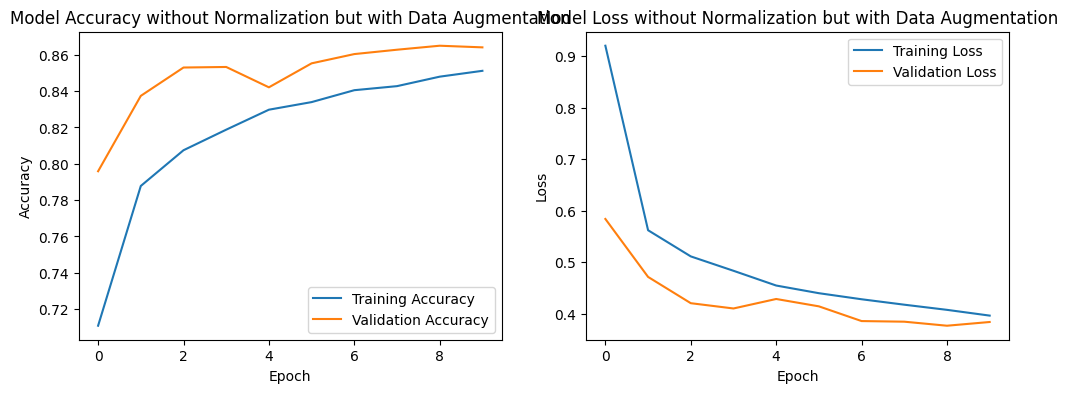

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the dataset without normalizing
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = np.expand_dims(train_images, axis=-1)  
test_images = np.expand_dims(test_images, axis=-1)  

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history_no_norm_with_aug = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                                     epochs=10,
                                     validation_data=(test_images, test_labels))

# Print accuracy
print("Training Accuracy:", history_no_norm_with_aug.history['accuracy'][-1])
print("Validation Accuracy:", history_no_norm_with_aug.history['val_accuracy'][-1])

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_no_norm_with_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_norm_with_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy without Normalization but with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_no_norm_with_aug.history['loss'], label='Training Loss')
plt.plot(history_no_norm_with_aug.history['val_loss'], label='Validation Loss')
plt.title('Model Loss without Normalization but with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Final training accuracy for LR 0.001: 0.8698
Final training accuracy for LR 0.01: 0.8381
Final training accuracy for LR 0.1: 0.1028


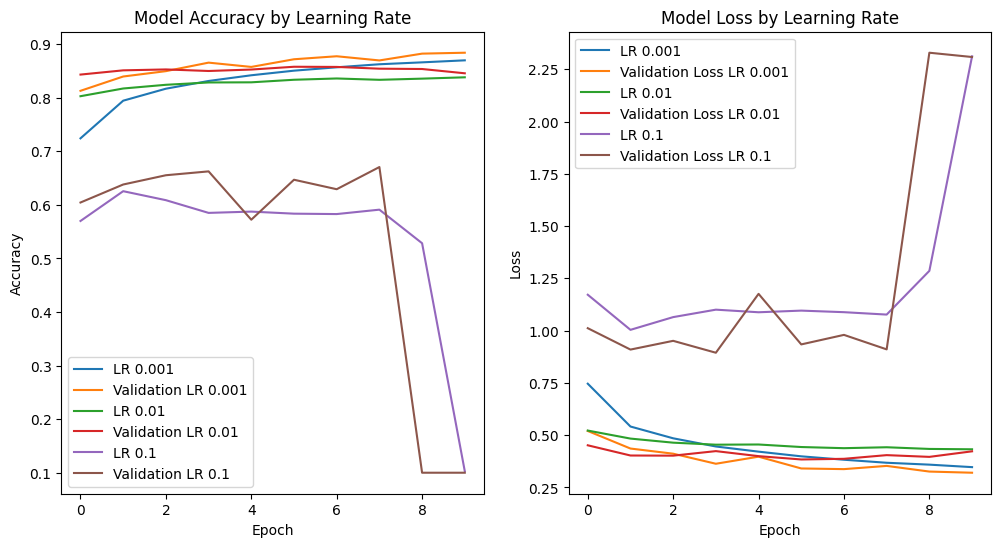

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1) / 255.0  
test_images = np.expand_dims(test_images, axis=-1) / 255.0  

# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List of learning rates to test
learning_rates = [0.001, 0.01, 0.1]

plt.figure(figsize=(12, 6))
for lr in learning_rates:
    # Compile and train model with different learning rates
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    #history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                        #epochs=10,
                        #validation_data=(test_images, test_labels),
                        #verbose=0)

for lr in learning_rates:
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                        epochs=10,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    print(f'Final training accuracy for LR {lr}: {history.history["accuracy"][-1]:.4f}')

    
    
    # Plot training & validation accuracy and loss for each learning rate
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'LR {lr}')
    plt.plot(history.history['val_accuracy'], label=f'Validation LR {lr}')
    plt.title('Model Accuracy by Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'LR {lr}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss LR {lr}')
    plt.title('Model Loss by Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.show()




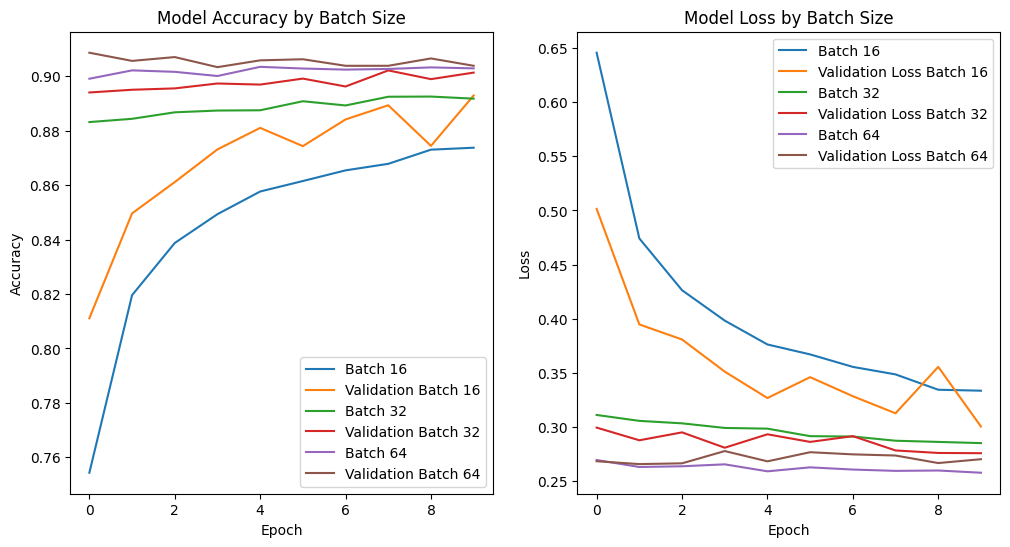

Final training accuracy for Batch 16: 0.9028
Final training accuracy for Batch 32: 0.9028
Final training accuracy for Batch 64: 0.9028


In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1) / 255.0  # Adding channel dimension and normalization
test_images = np.expand_dims(test_images, axis=-1) / 255.0  # Adding channel dimension and normalization

# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List of batch sizes to test
batch_sizes = [16, 32, 64]

# Model definition
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

plt.figure(figsize=(12, 6))

for batch_size in batch_sizes:
    # Train the model with data augmentation and specific batch size
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                        epochs=10,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    
    # Plot training & validation accuracy and loss for each batch size
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'Batch {batch_size}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Batch {batch_size}')
    plt.title('Model Accuracy by Batch Size')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'Batch {batch_size}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss Batch {batch_size}')
    plt.title('Model Loss by Batch Size')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.show()

# Print final training accuracy for each batch size
for batch_size in batch_sizes:
    print(f'Final training accuracy for Batch {batch_size}: {history.history["accuracy"][-1]:.4f}')


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.5210 - loss: 1.4861 - val_accuracy: 0.9467 - val_loss: 0.1751
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8573 - loss: 0.4520 - val_accuracy: 0.9621 - val_loss: 0.1196
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9021 - loss: 0.3259 - val_accuracy: 0.9682 - val_loss: 0.0930
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9172 - loss: 0.2803 - val_accuracy: 0.9734 - val_loss: 0.0851
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9254 - loss: 0.2415 - val_accuracy: 0.9640 - val_loss: 0.1089
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9352 - loss: 0.2212 - val_accuracy: 0.9602 - val_loss: 0.1354
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9385 - loss: 0.2122 - val_accuracy: 0.9792 - val_loss: 0.0662
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9413 - loss: 0.1979 - 

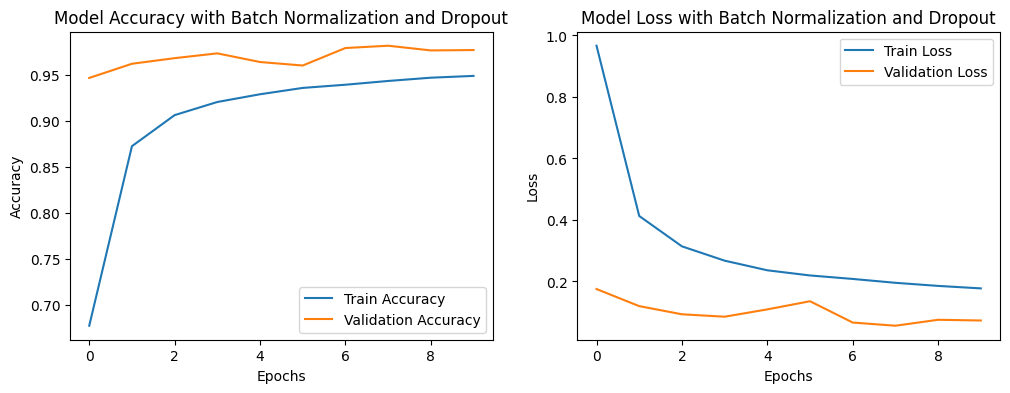

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0  # Normalize to [0, 1]
test_images = test_images / 255.0    # Normalize to [0, 1]
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
test_images = np.expand_dims(test_images, axis=-1)    # Add channel dimension

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Function to create model with Batch Normalization and Dropout
def create_model_with_bn_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),  # Dropout layer
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Another Dropout layer
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model_with_bn_dropout()

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=10,
                    validation_data=(test_images, test_labels),
                    verbose=1)  # Set verbosity to 1 for detailed output

# Print training and validation accuracy and loss
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

# Plotting the results
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Batch Normalization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Batch Normalization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.5184 - loss: 1.5079 - val_accuracy: 0.9452 - val_loss: 0.1858
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8475 - loss: 0.4752 - val_accuracy: 0.9658 - val_loss: 0.1101
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8949 - loss: 0.3388 - val_accuracy: 0.9661 - val_loss: 0.1075
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9134 - loss: 0.2850 - val_accuracy: 0.9775 - val_loss: 0.0715
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9255 - loss: 0.2507 - val_accuracy: 0.9777 - val_loss: 0.0698
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9339 - loss: 0.2257 - val_accuracy: 0.9800 - val_loss: 0.0667
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9383 - loss: 0.2106 - val_accuracy: 0.9787 - val_loss: 0.0661
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9403 - loss: 0.2015 - 

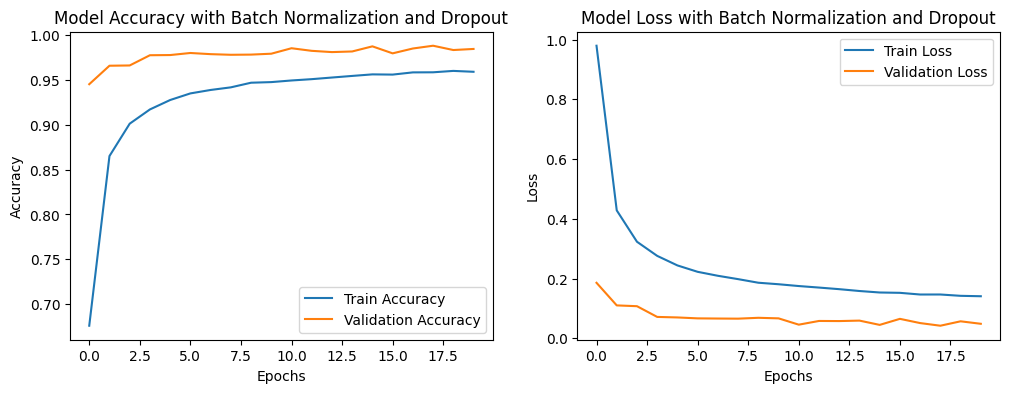

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0  # Normalize to [0, 1]
test_images = test_images / 255.0    # Normalize to [0, 1]
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
test_images = np.expand_dims(test_images, axis=-1)    # Add channel dimension

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Function to create model with Batch Normalization and Dropout
def create_model_with_bn_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),  # Dropout layer
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Another Dropout layer
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model_with_bn_dropout()

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,  # Increased the number of epochs
                    validation_data=(test_images, test_labels),
                    verbose=1)  # Set verbosity to 1 for detailed output

# Print training and validation accuracy and loss
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

# Plotting the results
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Batch Normalization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Batch Normalization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
